In [1]:
# THIS NOTEBOOK IS FOR TESTING THE TRAINED EM300CNN model
from EM300CNN import EM300CNN
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 10

# which device?
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Load pretrained model
model = EM300CNN(mean=0.4068)
# PRETRAINED_MODEL_PATH = "./saved/EM300CNN"
# PRETRAINED_MODEL_PATH = "./saved/EM300CNNTunedDecreasingLR0.001"
PRETRAINED_MODEL_PATH = "./saved/EM300CNNTunedLR0.001_gamma0.8_Every5_E50_Bs_4096"

model.load_state_dict(torch.load(PRETRAINED_MODEL_PATH, map_location=device))
model.eval()

# Dataset object for DataLoader
class EM300Dataset(Dataset):
    def __init__(self, x_data_path, y_data_path):
        super().__init__()
        self.x = torch.tensor(np.load(x_data_path))
        self.y = torch.tensor(np.load(y_data_path))

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx].unsqueeze(0), self.y[idx]

# Load datasets
DATA_DIR = "/scratch/gpfs/sbfisher/EM300/data/"
# Create datasets for training the inverse model. 
# Use the training dataset from forward network
x_data_path = DATA_DIR + "x_data.npy"
y_data_path = DATA_DIR + "y_data.npy"

dataset = EM300Dataset(x_data_path, y_data_path)

generator = torch.Generator().manual_seed(RANDOM_SEED)
train, val, test = torch.utils.data.random_split(dataset, [0.8, 0.1, 0.1], generator=generator)
print(len(val))

Using cpu device
31311


In [12]:
import torch
import matplotlib.pyplot as plt

def test_example(idx = 0, save=False, save_csv=False):
    struct, sim_spect = test[idx]
    struct = struct.unsqueeze(0)
    print(struct.squeeze())

    with torch.no_grad():
        # Predicted spectrum
        pred_spect = model(struct.float()).squeeze()

    # mean squared error between sim and predicted spectrums
    loss_fn = torch.nn.L1Loss()
    print("MSE Spectrum Loss = {}".format(loss_fn(sim_spect, pred_spect).item()))

    # Remember 54 long vector is split as follows:
    # Re(s11)x9, Im(s11)x9, ...

    # Plot real of s11 across frequencies
    n = 9
    s11_idxs = list(range(0, n))
    # print(s11_idxs)
    s11_sim = sim_spect[s11_idxs]
    s11_pred = pred_spect[s11_idxs]
    s11_im_idxs = list(range(n, n*2))
    s11_im_sim = sim_spect[s11_im_idxs]
    s11_im_pred = pred_spect[s11_im_idxs]

    freq = [30, 37, 40, 50, 60, 70, 80, 90, 100]
    plt.subplot(1,2,1)
    plt.plot(freq, s11_sim)
    plt.plot(freq, s11_pred)
    plt.ylim([-1, 1])
    plt.legend(["sim", "pred"])
    plt.title("Re(s11) pred and sim")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("Re(s11)")

    plt.subplot(1,2,2)
    s11_mag_sim = (1j*s11_im_sim+s11_sim).abs()
    s11_mag_pred = (1j*s11_im_pred+s11_pred).abs()
    plt.plot(freq, s11_mag_sim)
    plt.plot(freq, s11_mag_pred)
    plt.ylim([-1.5, 1.5])
    plt.legend(["sim", "pred"])
    plt.title("Mag(s11) pred and sim")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("Mag(s11)")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

    if save:
        save_fig_name = "/scratch/gpfs/sbfisher/EM300/tests/s11_ex{}.png".format(idx)
        plt.savefig(save_fig_name, dpi=300)

    # Plot real of s12 across frequencies, starts at idx 18
    s12_idxs = list(range(n*2, n*3))
    s12_sim = sim_spect[s12_idxs]
    s12_pred = pred_spect[s12_idxs]
    # Plot mag of s12 across frequencies, starts at idx 27
    s12_idxs = list(range(n*3, n*4))
    s12_im_sim = sim_spect[s12_idxs]
    s12_im_pred = pred_spect[s12_idxs]

    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(freq, s12_sim)
    plt.plot(freq, s12_pred)
    plt.ylim([-1, 1])
    plt.legend(["sim", "pred"])
    plt.title("Re(s21) pred and sim")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("Re(s21)")
    
    plt.subplot(1,2,2)
    s12_mag_sim = (1j*s12_im_sim+s12_sim).abs()
    s12_mag_pred = (1j*s12_im_pred+s12_pred).abs()
    plt.plot(freq, s12_mag_sim)
    plt.plot(freq, s12_mag_pred)
    plt.ylim([-1.5, 1.5])
    plt.legend(["sim", "pred"])
    plt.title("Mag(s21) pred and sim")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("Mag(s21)")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

    if save:
        save_fig_name = "/scratch/gpfs/sbfisher/EM300/tests/s12_ex{}.png".format(idx)
        plt.savefig(save_fig_name, dpi=300)

    # Plot real of s12 across frequencies, starts at idx 18
    s22_idxs = list(range(n*4, n*5))
    s22_sim = sim_spect[s22_idxs]
    s22_pred = pred_spect[s22_idxs]
    # Plot mag of s12 across frequencies, starts at idx 27
    s12_idxs = list(range(n*5, n*6))
    s22_im_sim = sim_spect[s22_idxs]
    s22_im_pred = pred_spect[s22_idxs]

    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(freq, s22_sim)
    plt.plot(freq, s22_pred)
    plt.ylim([-1, 1])
    plt.legend(["sim", "pred"])
    plt.title("Re(s22) pred and sim")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("Re(s22)")
    
    plt.subplot(1,2,2)
    s22_mag_sim = (1j*s22_im_sim+s22_sim).abs()
    s22_mag_pred = (1j*s22_im_pred+s22_pred).abs()
    plt.plot(freq, s22_mag_sim)
    plt.plot(freq, s22_mag_pred)
    plt.ylim([-1.5, 1.5])
    plt.legend(["sim", "pred"])
    plt.title("Mag(s22) pred and sim")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("Mag(s22)")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

    if save:
        save_fig_name = "/scratch/gpfs/sbfisher/EM300/tests/s22_ex{}.png".format(idx)
        plt.savefig(save_fig_name, dpi=300)

    plt.figure()
    plt.plot(sim_spect)
    plt.plot(pred_spect)
    plt.title("Total Output of CNN")
    plt.legend(["sim", "pred"])
    for i in range(9, 54, 9):
        plt.axvline(x = i, color = 'y')

    print("figures saved to directory: /scratch/gpfs/sbfisher/EM300/tests/")

    if save_csv:

        save_struct_path = "/scratch/gpfs/sbfisher/EM300/tests/struct{}.csv".format(idx)
        save_data_path = "/scratch/gpfs/sbfisher/EM300/tests/sparams{}.csv".format(idx)

        s = np.array(struct)
        sparams = np.array(pred_spect)
        np.savetxt(save_struct_path, s.squeeze(), delimiter=",")
        np.savetxt(save_data_path, sparams.squeeze(), delimiter=",")
        
    
    

tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
        [0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.],
        [0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
        [0., 1.,

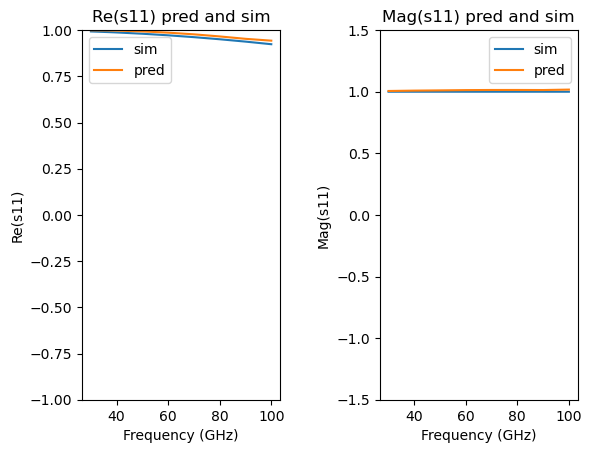

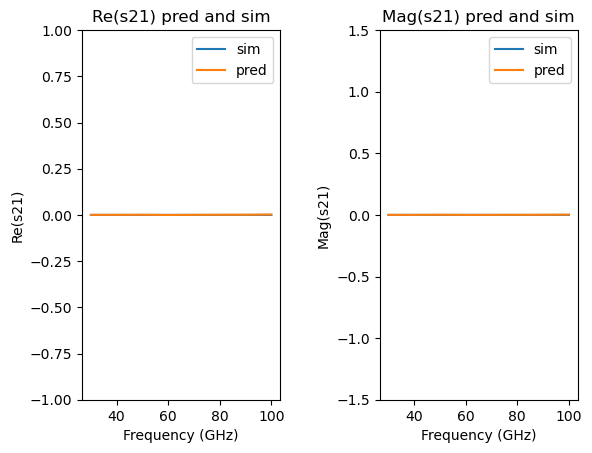

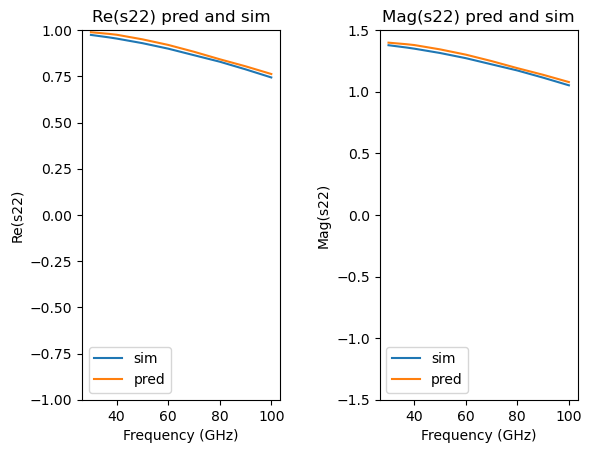

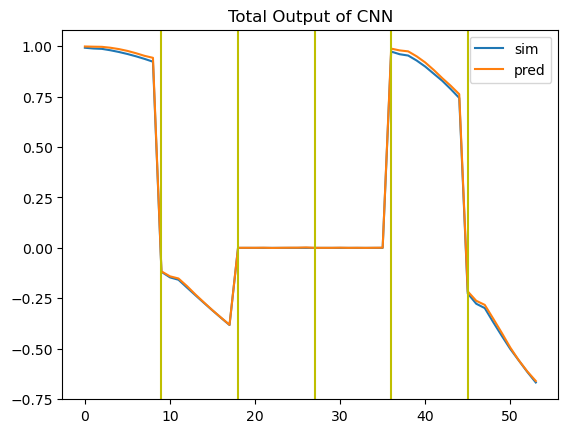

In [13]:
test_example(1042, save=True) # use this as zero example

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.],
        [0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
        [0., 0.,

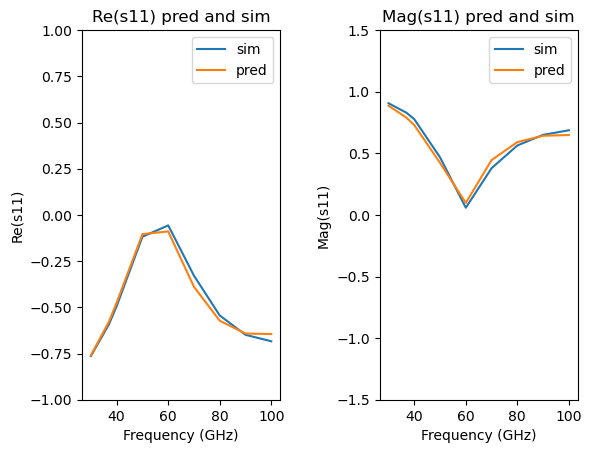

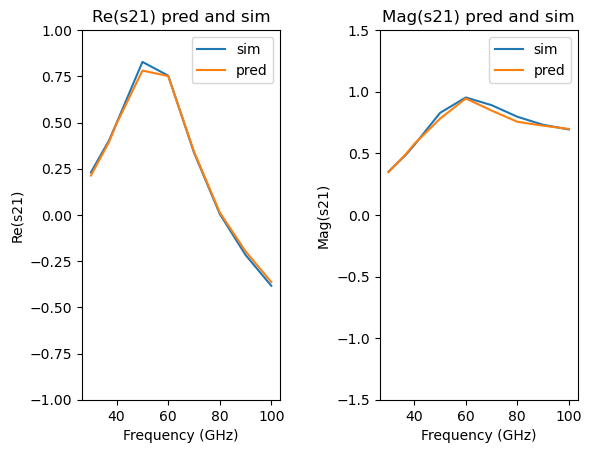

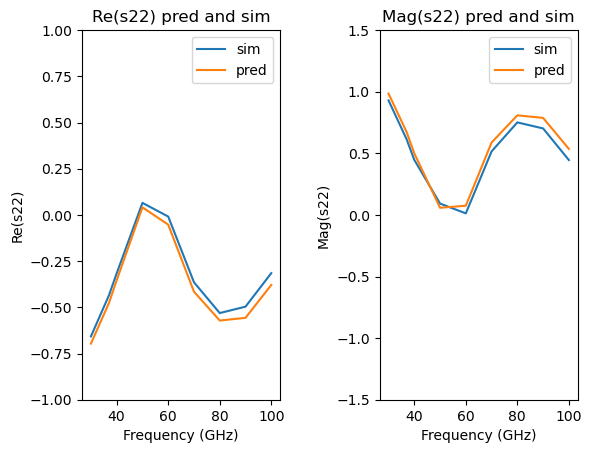

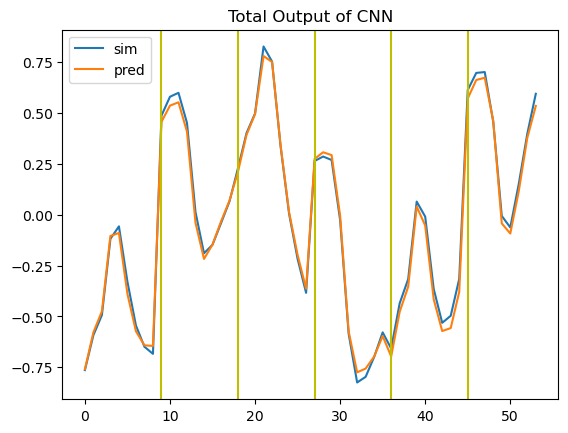

In [14]:
test_example(1054, save=True, save_csv=True) # use this

tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.],
        [1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.],
        [0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
        [0., 0.,

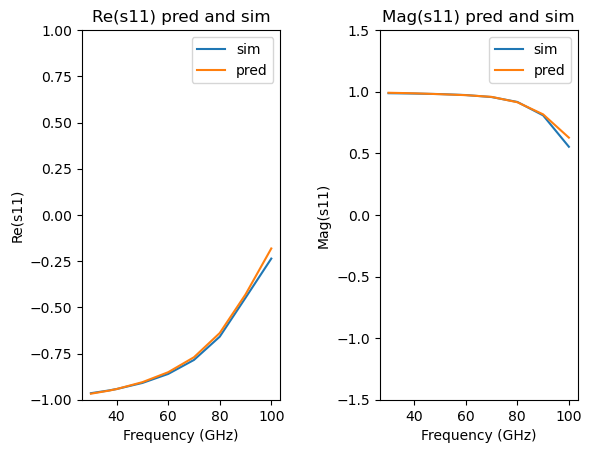

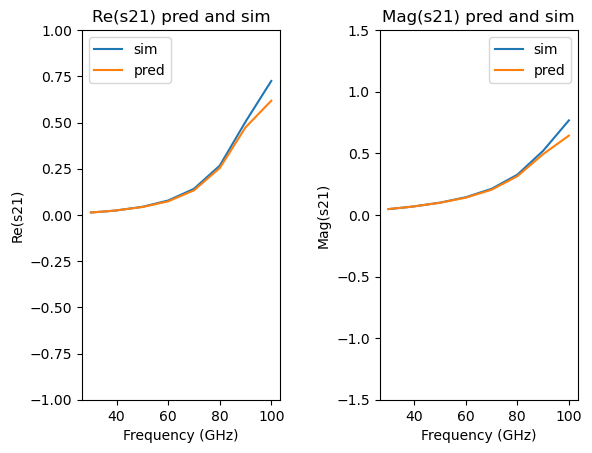

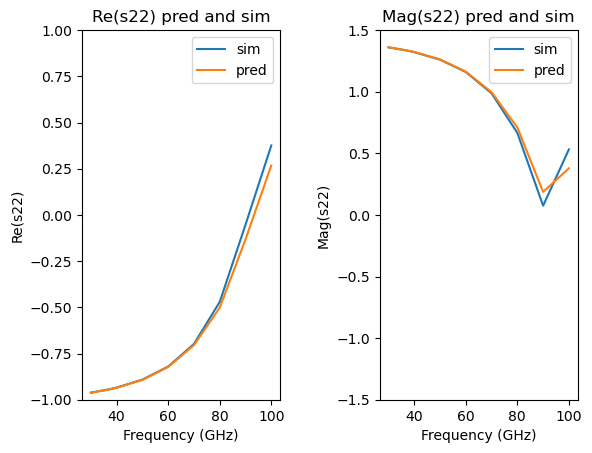

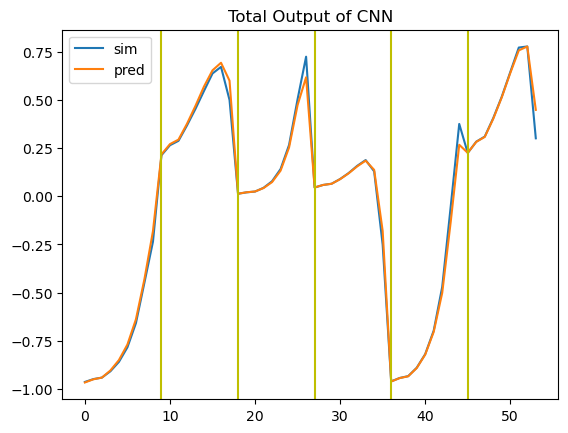

In [37]:
test_example(1084, save=True)